# Task 1

***

## Web scraping and analysis

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [53]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 80

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div",{"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 80 total reviews
Scraping page 2
   ---> 160 total reviews
Scraping page 3
   ---> 240 total reviews
Scraping page 4
   ---> 320 total reviews
Scraping page 5
   ---> 400 total reviews
Scraping page 6
   ---> 480 total reviews
Scraping page 7
   ---> 560 total reviews
Scraping page 8
   ---> 640 total reviews
Scraping page 9
   ---> 720 total reviews
Scraping page 10
   ---> 800 total reviews


In [76]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Starting off at Heathrow Te...
1,Not Verified | We have flown this route with ...
2,✅ Trip Verified | A last minute business trip ...
3,✅ Trip Verified | Overall I would say disapp...
4,Not Verified | LHR to Delhi in Business. Exce...
...,...
795,✅ Trip Verified | London to Belfast. Check in ...
796,Not Verified | London Gatwick to Salzburg wit...
797,✅ Trip Verified | Frankfurt to London. Flight...
798,✅ Trip Verified | Hyderabad to San Francisco ...


***

## Data Cleaning

In [55]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Starting off at Heathrow Terminal 3. Check i...
1,We have flown this route with EasyJet regula...
2,"A last minute business trip to HND, a route I..."
3,Overall I would say disappointing. Due to B...
4,LHR to Delhi in Business. Exceptional flight...
...,...
795,London to Belfast. Check in was fast and effi...
796,London Gatwick to Salzburg with British Airw...
797,Frankfurt to London. Flight attendants very ...
798,Hyderabad to San Francisco via London. I had...


In [56]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...


### Remove punctuation

In [57]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation,'')
    return text

df['Cleaned Reviews'] = remove_punctuation(df['Cleaned Reviews'])
df

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...
...,...,...
795,London to Belfast. Check in was fast and effi...,London to Belfast Check in was fast and effic...
796,London Gatwick to Salzburg with British Airw...,London Gatwick to Salzburg with British Airwa...
797,Frankfurt to London. Flight attendants very ...,Frankfurt to London Flight attendants very ki...
798,Hyderabad to San Francisco via London. I had...,Hyderabad to San Francisco via London I had a...


### Lower case

In [58]:
# Convertir les caractères en minuscules dans la colonne 'Cleaned Reviews'
df['Cleaned Reviews'] = df['Cleaned Reviews'].str.lower()
df

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,starting off at heathrow terminal check in wa...
1,We have flown this route with EasyJet regula...,we have flown this route with easyjet regular...
2,"A last minute business trip to HND, a route I...",a last minute business trip to hnd a route i ...
3,Overall I would say disappointing. Due to B...,overall i would say disappointing due to ba s...
4,LHR to Delhi in Business. Exceptional flight...,lhr to delhi in business exceptional flight s...
...,...,...
795,London to Belfast. Check in was fast and effi...,london to belfast check in was fast and effic...
796,London Gatwick to Salzburg with British Airw...,london gatwick to salzburg with british airwa...
797,Frankfurt to London. Flight attendants very ...,frankfurt to london flight attendants very ki...
798,Hyderabad to San Francisco via London. I had...,hyderabad to san francisco via london i had a...


### Stop words

In [59]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [61]:
def remove_stopwords(text: str) -> str:

    # convert the filtered list back to a string
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(remove_stopwords)
df.head()

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty years age...
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...


### Stemming VS Lemmatization

Stemming is faster and less precise because it simply truncates words, while lemmatization is more precise but slower because it takes into account the linguistic structure of the word. The choice between stemming and lemmatization depends on the specific needs of the project and the intended application.

### Lemmatization

Lemmatization aims to bring words back to their canonical form or to their lemma, that is to say their basic form or dictionary.
Unlike stemming, lemmatisation takes into account the morphology of the word and its grammatical context to produce a valid and recognized form.
Lemmatization often requires more complex analysis and linguistic resources such as dictionaries or grammatical rules.
The results of lemmatization are usually real and understandable words.

In [62]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary resources for NLTK if you haven't already done so
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)  # Word tokenization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Application of lemmatization to each word
    return " ".join(lemmatized_tokens)  

# Apply the lemmatize_text function to the 'Cleaned Reviews' column
df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(lemmatize_text)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty year age ...
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...
...,...,...
795,London to Belfast. Check in was fast and effi...,london belfast check fast efficient using ba t...
796,London Gatwick to Salzburg with British Airw...,london gatwick salzburg british airway worst c...
797,Frankfurt to London. Flight attendants very ...,frankfurt london flight attendant kind flying ...
798,Hyderabad to San Francisco via London. I had...,hyderabad san francisco via london awesome exp...


***

## Sentiment Analysis using VADER

VADER ("Valence Aware Dictionary and sEntiment Reasoner"), is a sentiment analysis tool integrated in NLTK (Natural Language Toolkit) for Python. It is widely used to evaluate the sentiment of texts, especially in social media and online comments.

In [63]:
!pip install vaderSentiment

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Set a function to get the sentiment score for each text
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = df['Cleaned Reviews'].apply(get_sentiment_score)
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,Cleaned Reviews,Sentiment Score
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...,0.9971
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty year age ...,0.7717
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...,0.9775
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...,-0.7441
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...,0.9788
...,...,...,...
795,London to Belfast. Check in was fast and effi...,london belfast check fast efficient using ba t...,0.9755
796,London Gatwick to Salzburg with British Airw...,london gatwick salzburg british airway worst c...,-0.8658
797,Frankfurt to London. Flight attendants very ...,frankfurt london flight attendant kind flying ...,0.7269
798,Hyderabad to San Francisco via London. I had...,hyderabad san francisco via london awesome exp...,0.8910


In [65]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment Score'].apply(vader_analysis)
df

,reviews,Cleaned Reviews,Sentiment Score,Analysis
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...,0.9971,Positive
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty year age ...,0.7717,Positive
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...,0.9775,Positive
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...,-0.7441,Negative
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...,0.9788,Positive
...,...,...,...,...
795,London to Belfast. Check in was fast and effi...,london belfast check fast efficient using ba t...,0.9755,Positive
796,London Gatwick to Salzburg with British Airw...,london gatwick salzburg british airway worst c...,-0.8658,Negative
797,Frankfurt to London. Flight attendants very ...,frankfurt london flight attendant kind flying ...,0.7269,Positive
798,Hyderabad to San Francisco via London. I had...,hyderabad san francisco via london awesome exp...,0.8910,Positive


In [66]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    362
Negative    344
Neutral      94
Name: count, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x1b18c0cb350>,
 [Text(0.1635397261721477, 1.087775141269343, 'Positive'),
  Text(-0.5450045996867512, -0.9554946291425631, 'Negative'),
  Text(1.1191668079081616, -0.4329730431293109, 'Neutral')],
 [Text(0.08920348700298965, 0.5933318952378234, '45.2%'),
  Text(-0.29727523619277335, -0.5211788886232162, '43.0%'),
  Text(0.6528473046130943, -0.25256760849209803, '11.7%')])

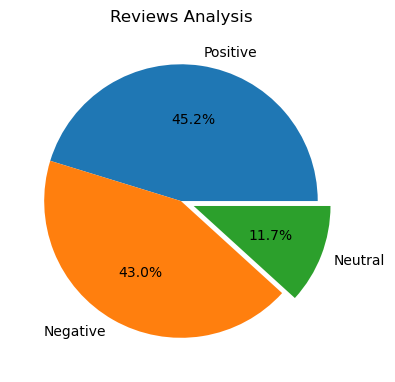

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.1), autopct='%1.1f%%')